<h1 style="color:orange">EXERCISE CLASS 2 (Part 2/3)</h1>

# Statistical Inference - Hypothesis testing

Hypothesis testing (1/6)

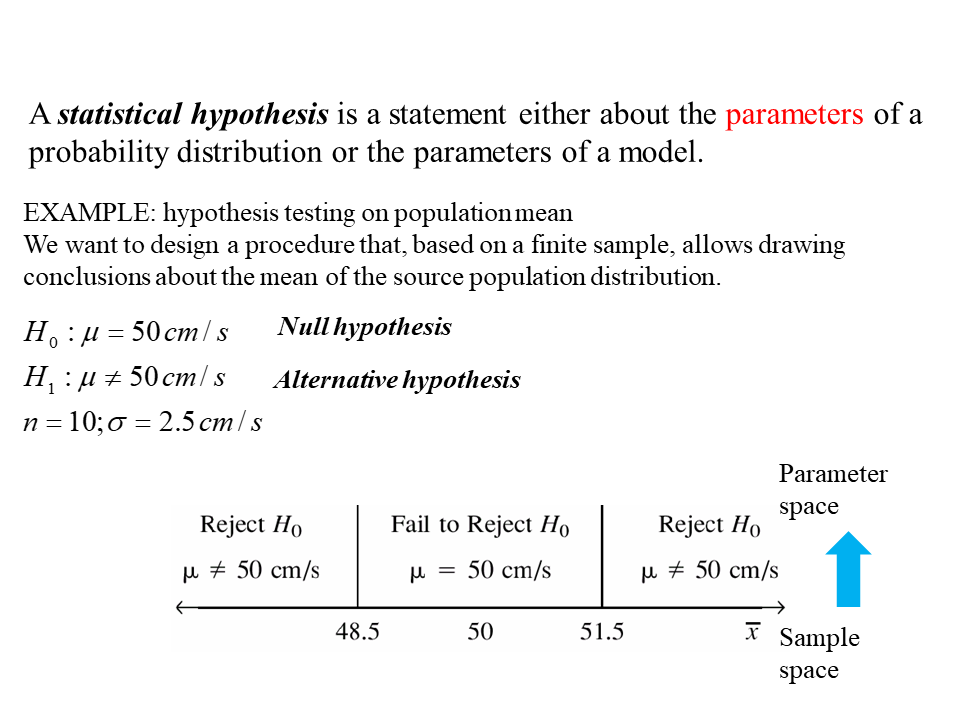

Hypothesis testing (2/6)

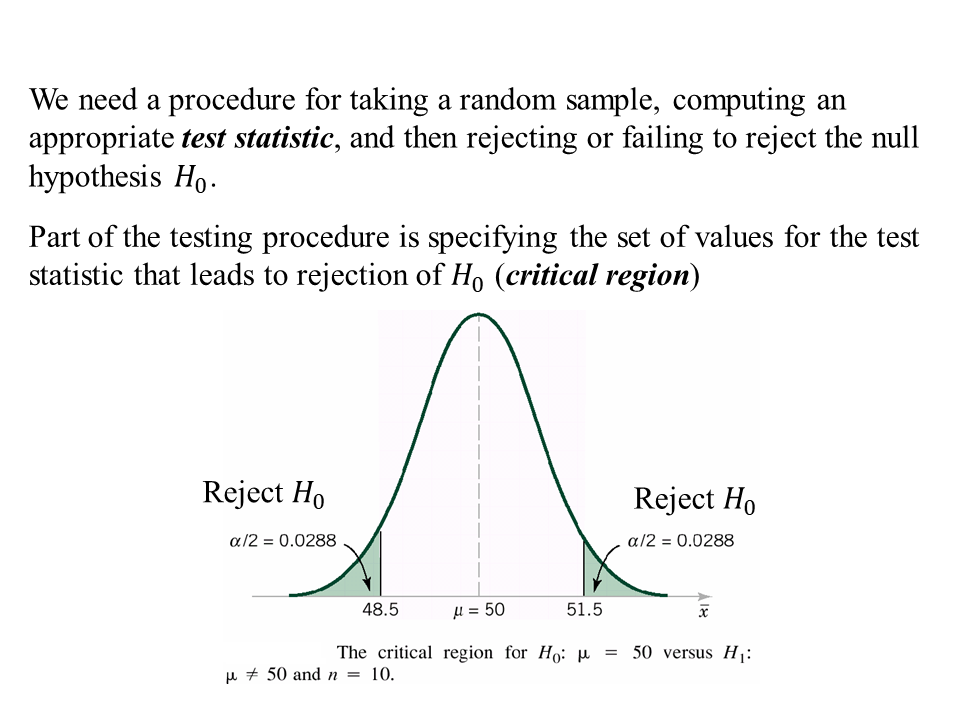

Hypothesis testing (3/6)

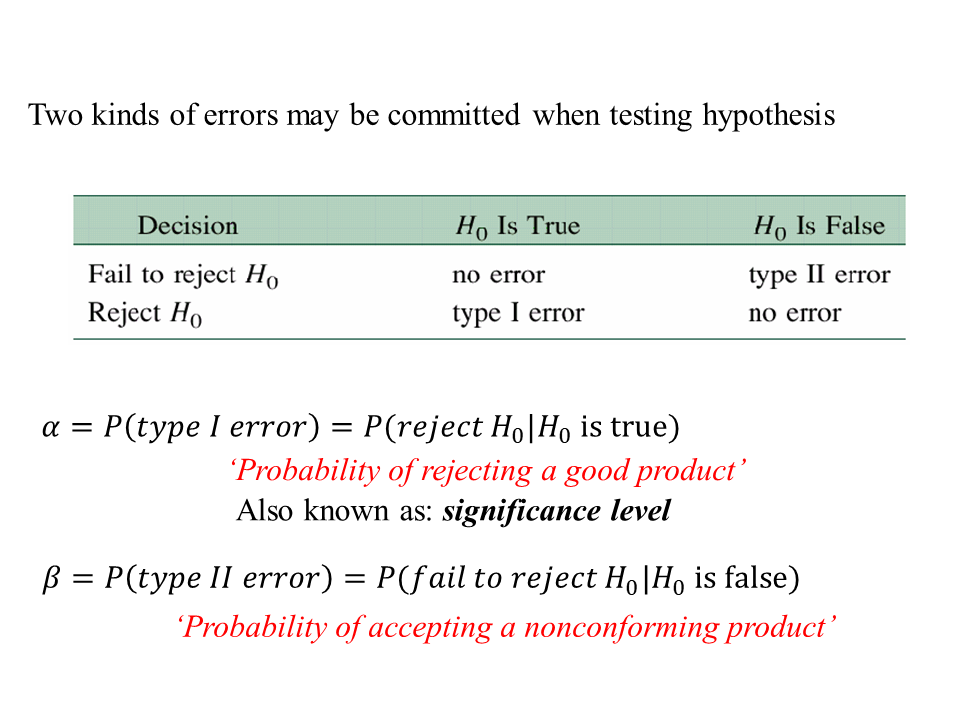

Hypothesis testing (4/6)

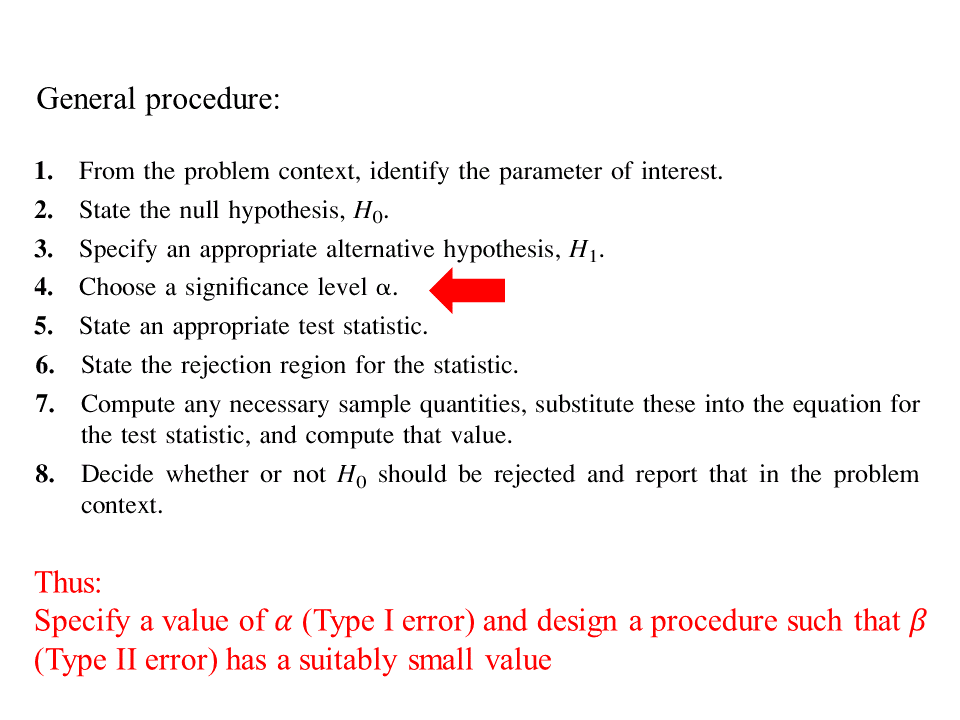

Hypothesis testing (5/6)

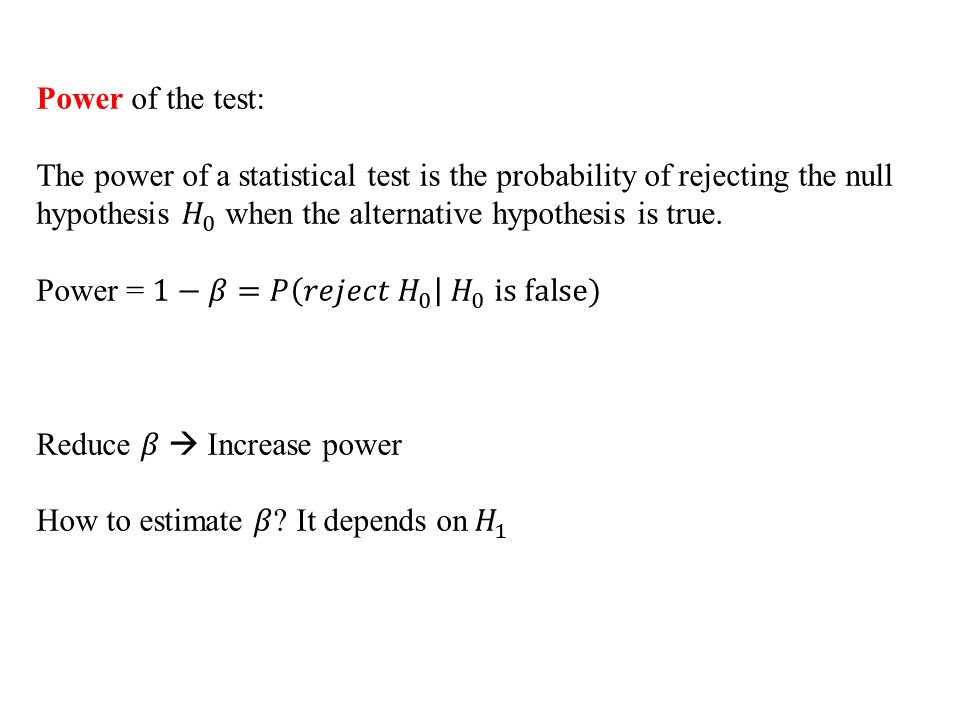

Hypothesis testing (6/6)

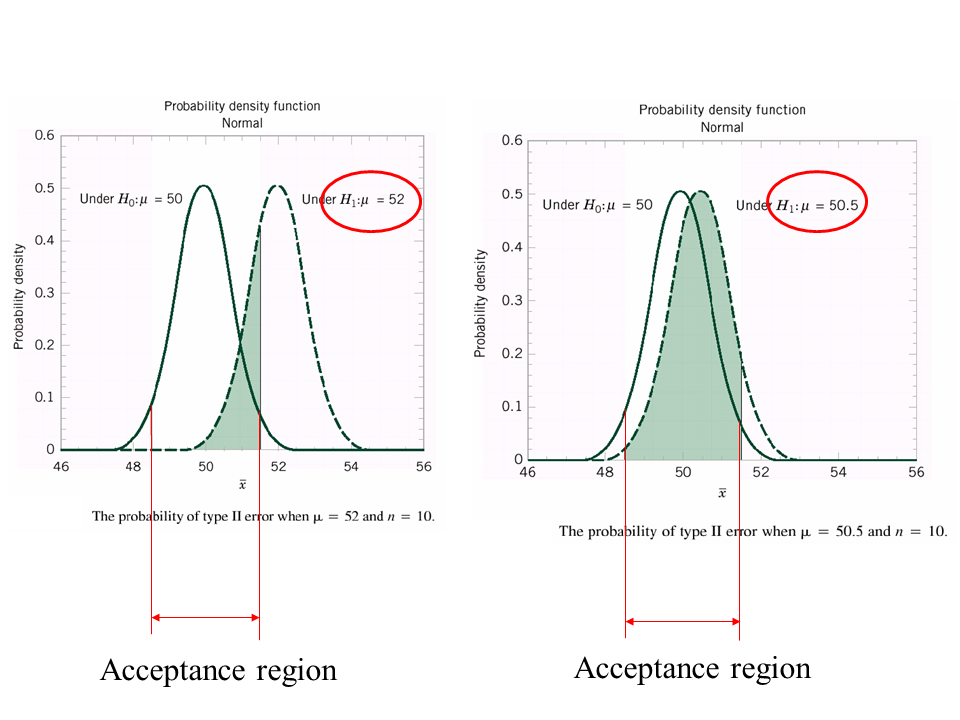

Hypothesis testing and confidence intervals 

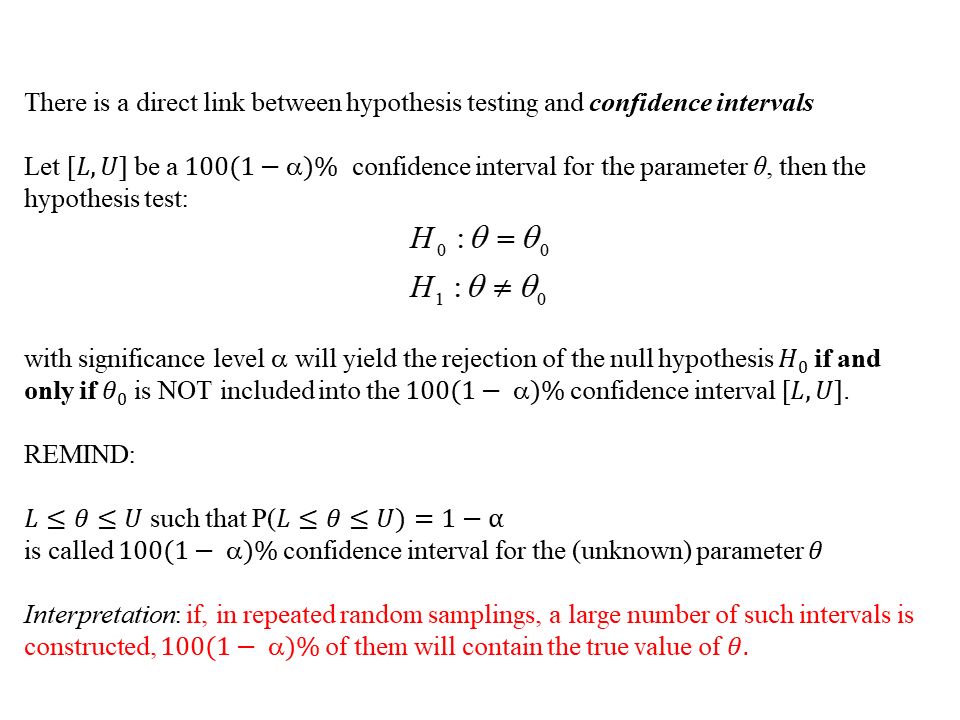

Confidence intervals 

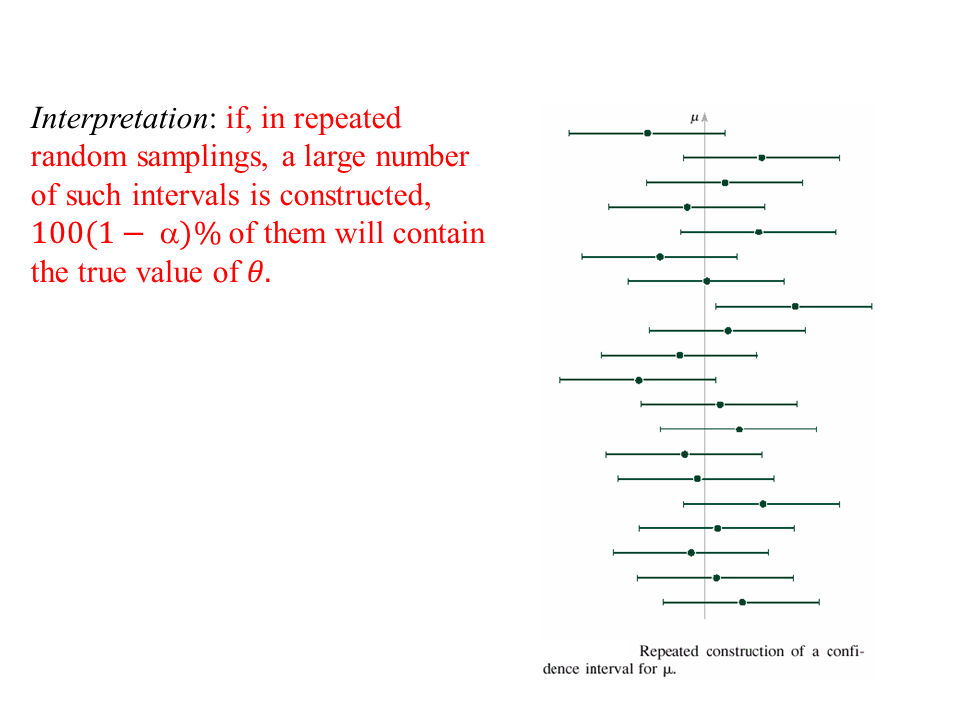

Some important tests

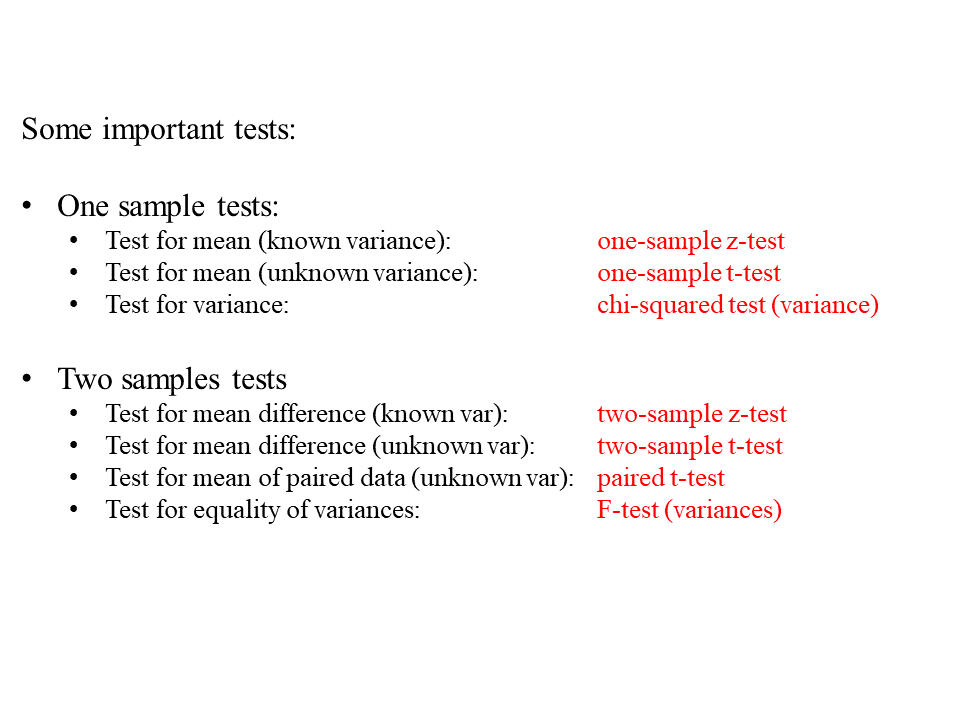

# One-sample Z-test

**Assumptions** 
- $X_1, X_2, ..., X_n$ is a random sample of size $n$ from a population.
- Population is **normal**.
- The **variance** of the population is **known**. 

Under those assumptions, the quantity $Z$ follows a standard normal distribution $N(0,1)$.
$$ Z = \frac{\bar{X} - \mu}{{\sigma}/{\sqrt{n}}} $$


**Null hypothesis:**
$H_0: \mu = \mu_0$

Where:
- $\mu$ is the population mean
- $\mu_0$ is the hypothesized population mean


**Test statistic:** 
$ Z_0 = \frac{\bar{X} - \mu_0}{{\sigma}/{\sqrt{n}}} $

<center>

| Alternative hypotheses | Rejection criterion |
|----------|----------|
| $H_1: \mu \neq \mu_0$ | $\|Z_0\| > z_{\alpha/2}$|
| $H_1: \mu > \mu_0$ | $Z_0 > z_{\alpha}$|
| $H_1: \mu < \mu_0$ | $Z_0 < -z_{\alpha}$|
</center>


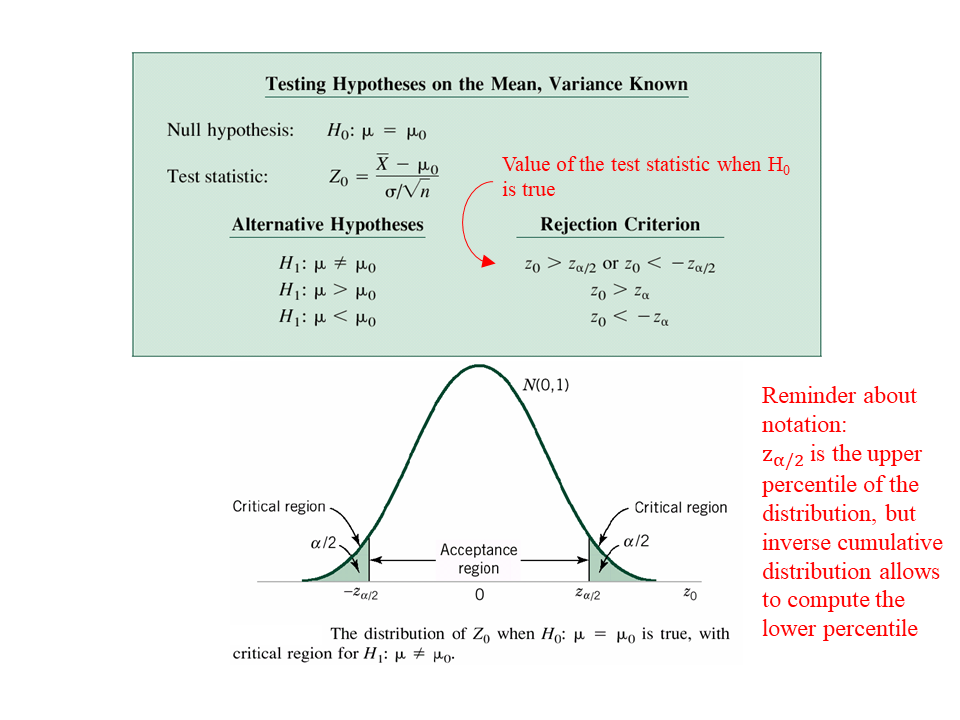

1 sample Z test - Confidence interval 

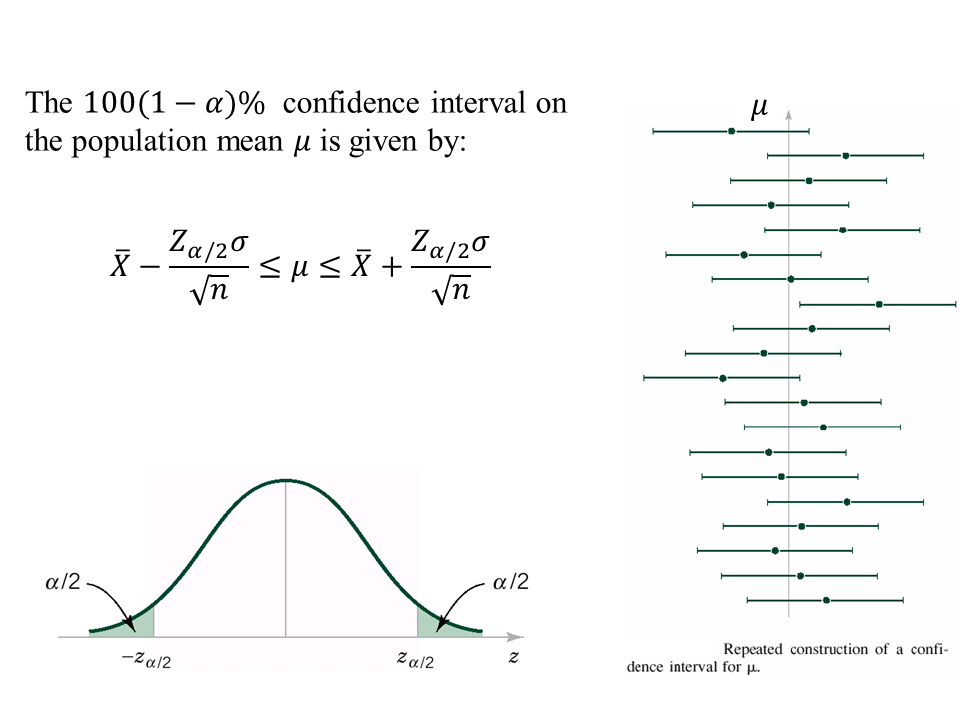

1 sample Z test - P-value computation (1/2)

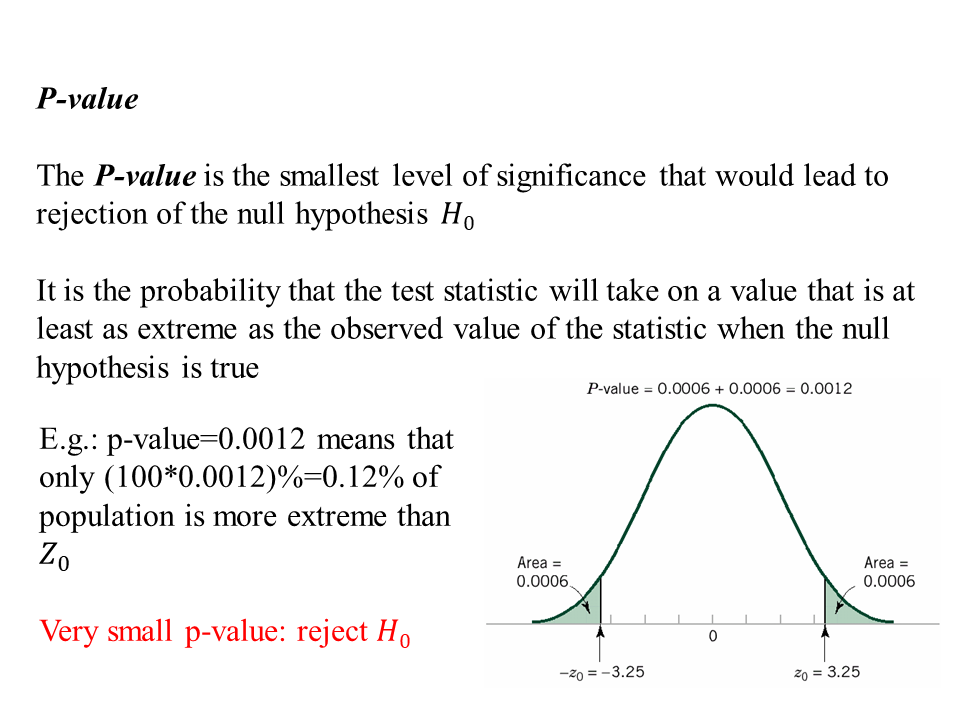

1 sample Z test - P-value computation (2/2)

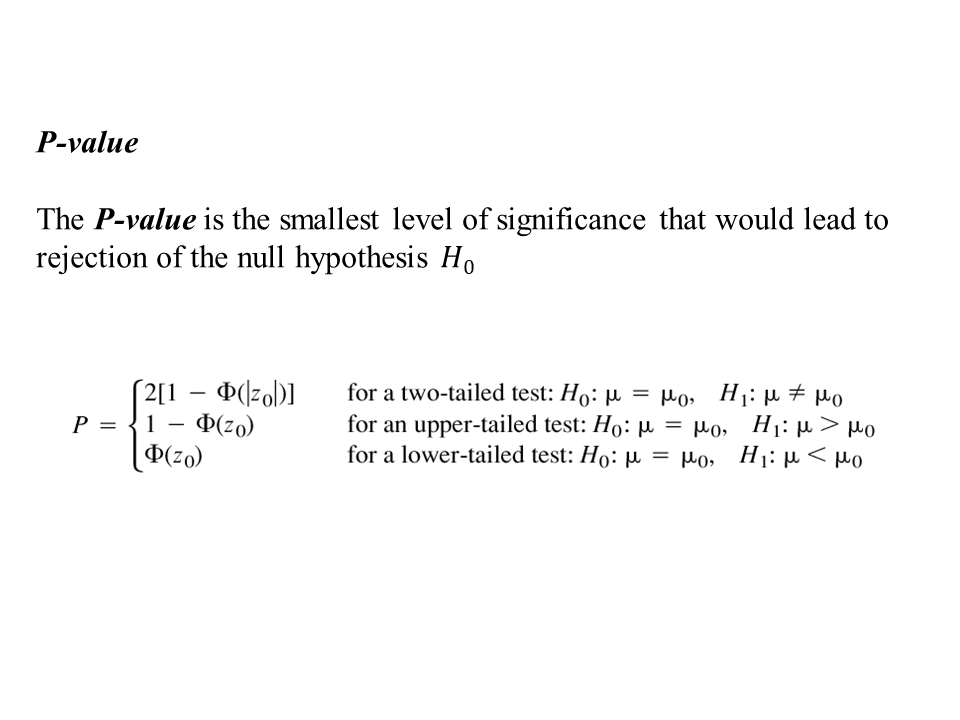

1 sample Z test - Type II error (1/2)

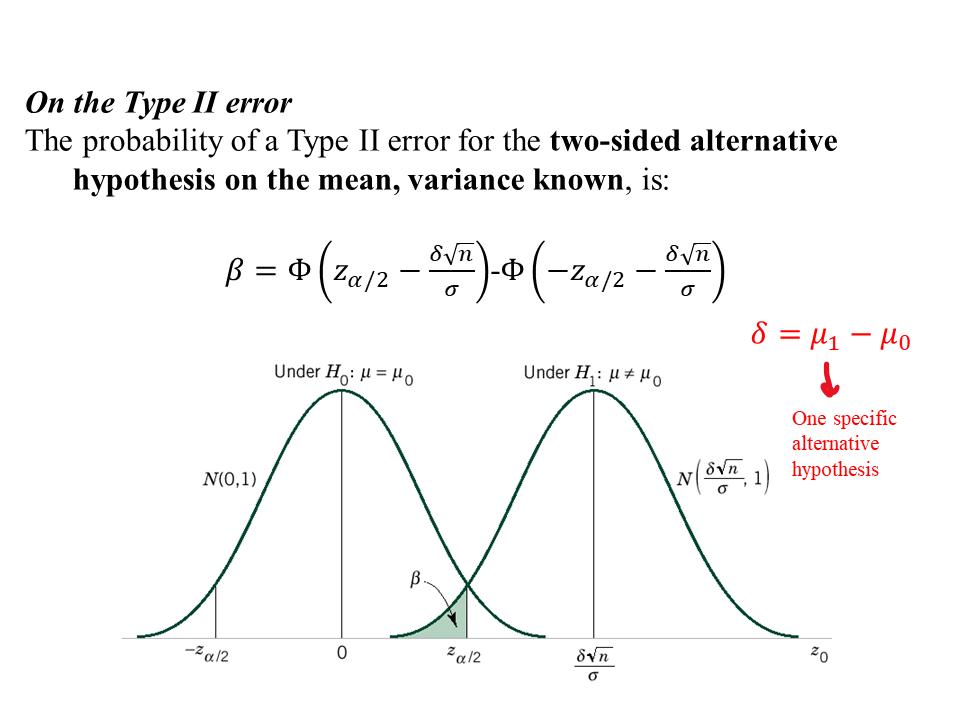

1 sample Z test - Type II error (2/2)

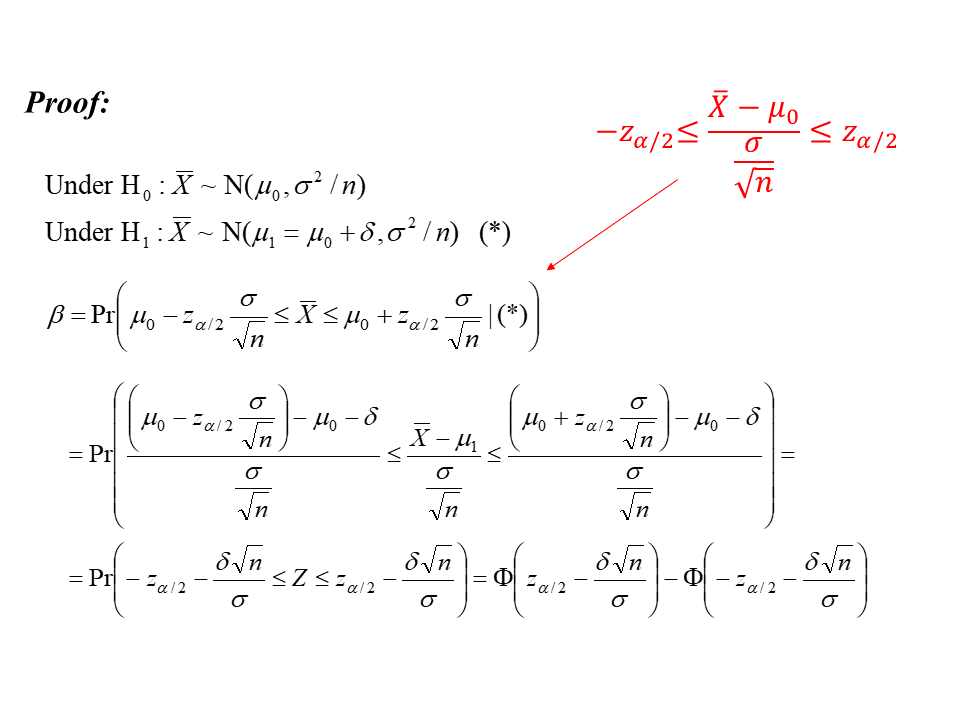

# `scipy.stats` for hypothesis testing

The `scipy.stats` library contains several functions for performing the most common hypothesis testing. 

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the library for hypothesis testing scipy
import scipy.stats as stats

# One simple example...
mu = 10     # mean
sigma = 1   # standard deviation
n = 10    # sample size

# Generate the random sample
np.random.seed(230315)
x1 = np.random.normal(mu, sigma, n)

# Choose the mean of the null hypothesis
mu0 = 10.1

# Calculate the Z-statistic
Z_0 = (np.mean(x1) - mu0) / (sigma / np.sqrt(n))

print('Test statistic Z_0 = %.3f' % Z_0)

Test statistic Z_0 = -0.491


Let's test $H_0$ against $H_1: \mu \neq \mu_0$.

In [2]:

# Compare the Z-statistic with the critical value
alpha = 0.05   # significance level
z_alpha2 = stats.norm.ppf(1-alpha/2)    #remind: inverse cumulative distribution function 

if np.abs(Z_0) > z_alpha2:
    print('Reject the null hypothesis at alpha = %.2f' % alpha)
else:
    print('Accept the null hypothesis at alpha = %.2f' % alpha)

Accept the null hypothesis at alpha = 0.05


We can also compute the corresponding confidence interval as:
$$\bar{X} -  Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} \leq \mu \leq \bar{X} +  Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}$$


In [3]:
# Compute the confidence interval
CI = [np.mean(x1) - z_alpha2 * sigma/np.sqrt(n), np.mean(x1) + z_alpha2 * sigma/np.sqrt(n)]
print('Confidence interval: %.3f, %.3f' % (CI[0],CI[1]))

Confidence interval: 9.325, 10.565


In [4]:
# Or use the built-in function
CI = stats.norm.interval(1-alpha, loc=np.mean(x1), scale=sigma/np.sqrt(n))
print('Confidence interval: %.3f, %.3f' % (CI[0],CI[1]))

Confidence interval: 9.325, 10.565


The p-value can be computed from the $Z_0$ test statistic by applying the `cdf()` function.

In [5]:
pval = 2 * ( 1 - stats.norm.cdf(np.abs(Z_0)) )      #attention: bilateral rejection region
print('p-value = %.3f' % pval)

p-value = 0.624


In [6]:
z_alpha2 = stats.norm.ppf(1-alpha/2)    #remind: inverse cumulative distribution function 
print(z_alpha2)

1.959963984540054


## EXERCISE 1

The life time of neon lights (expressed in hours) is approximately distributed as a normal variable with known standard deviation equal to 25 hours. Assume we have a sample of 20 lights ; the sample mean life was measured and it is equal to 1014 hours.

a) Is there statistical evidence to state that the mean life of neon lights is **larger** than 1000 hours? (confidence level: 95%)

b) Compute the p-value (previous question)

c) Compute a two-sided 95% confidence interval for the mean life

d) Compute a one-sided (lower-side) 95% confidence interval for the mean life

e) Compute the power curve (with $\mu_1 = \mu_0 + \delta$) when $H_1: \mu \neq \mu_0$ for $n = 20$ and $n = 40$. Comment the curve.

In [7]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the library for hypothesis testing scipy
import scipy.stats as stats

In [8]:
# Input the data of the problem
sigma = 25  # standard deviation
n = 20      # number of samples
mu = 1014   # estimated mean

### Point a

Is there statistical evidence to state that the mean life of neon lights is *larger* than 1000 hours? (confidence level: 95%)

**One-sample Z-test**

Null hypothesis:        
$$H_0: \mu = \mu_0$$

Alternative hypothesis: 
$$H_1: \mu > \mu_0$$
where $\mu_0 = 1000$.

Test statistic:
$$Z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}}$$

where $\bar{x}$ is the sample mean, $\mu_0$ is the hypothesized mean, $\sigma$ is the standard deviation of the population, and $n$ is the sample size.

In [9]:
# Answer to point a
CL = 0.95       # confidence level
alpha = 1 - CL  # significance level

# One-sample Z-test
mu0 = 1000      # null hypothesis
Z_0 = (mu - mu0) / (sigma / np.sqrt(n))
print("Test statistic Z_0 = %.3f" % Z_0)

Test statistic Z_0 = 2.504


The critical value is $Z_{\alpha}$ can be computed using the `norm.ppf()` function from the `scipy.stats` module.

In [10]:
# Critical value
Z_alpha = stats.norm.ppf(1 - alpha)
print("Critical value Z_alpha = %.3f" % Z_alpha)

Critical value Z_alpha = 1.645


Now we can compare the test statistic to the critical value to determine whether to reject the null hypothesis. If $Z_0 > Z_{\alpha}$, then we reject the null hypothesis.

In [11]:
# if Z_0 > Z_alpha, then reject the null hypothesis
if Z_0 > Z_alpha:
    print("Reject the null hypothesis.")
else:
    print("Accept the null hypothesis.")

Reject the null hypothesis.


### Point b

Compute the p-value

We can also compute the p-value using the `norm.cdf()` function from the `scipy.stats` module. If the p-value is less than the significance level, then we reject the null hypothesis.

In [12]:
pval = 1 - stats.norm.cdf(Z_0)
print("p-value = %.3f" % pval)

if pval < alpha:
    print("Reject the null hypothesis.")
else:
    print("Accept the null hypothesis.")

p-value = 0.006
Reject the null hypothesis.


*Bonus: visualize the test statistic and the critical value on a normal distribution.*

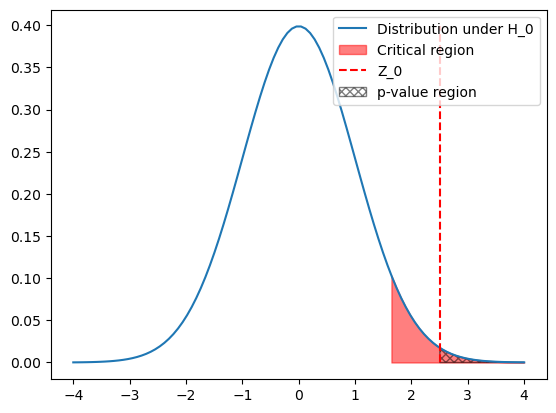

In [13]:
# Plot the normal distribution
x = np.linspace(-4, 4, 100)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y, label='Distribution under H_0')

# Plot the critical region
x_fill = np.linspace(Z_alpha, 4, 100)
y_fill = stats.norm.pdf(x_fill, 0, 1)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label='Critical region')

# Plot the test statistic
plt.vlines(Z_0, 0, np.max(y), color='red', linestyles='dashed', label='Z_0')

# Plot the p-value region and will with a pattern
x_fill = np.linspace(Z_0, 4, 100)
y_fill = stats.norm.pdf(x_fill, 0, 1)
plt.fill_between(x_fill, y_fill, facecolor='none', alpha=0.5, hatch='xxxx', label='p-value region')
plt.legend()

plt.show()

### Point c

Compute the 2-sided confidence interval on the mean.

The two-sided confidence interval is computed as:
$$\bar{x} - Z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \leq \mu \leq \bar{x} + Z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$$

where $\bar{x}$ is the sample mean, $Z_{\alpha/2}$ is the critical value, $\sigma$ is the standard deviation of the population, and $n$ is the sample size.

In [14]:
# Answer to point c
Z_alpha2 = stats.norm.ppf(1 - alpha / 2)

CI = [mu - Z_alpha2 * sigma / np.sqrt(n), mu + Z_alpha2 * sigma / np.sqrt(n)]
print("Confidence interval: [%.3f, %.3f]" % (CI[0], CI[1]))

Confidence interval: [1003.043, 1024.957]


### Point d

Compute the one-sided (lower side) 95% confidence interval for the mean of the population.

The one-sided confidence interval is computed as:
$$\bar{x} - Z_{\alpha} \frac{\sigma}{\sqrt{n}} \leq \mu$$

where $\bar{x}$ is the sample mean, $Z_{\alpha}$ is the critical value, $\sigma$ is the standard deviation of the population, and $n$ is the sample size.

In [15]:
# Answer to point d
Z_alpha = stats.norm.ppf(1 - alpha)
CI_lower = mu - Z_alpha * sigma / np.sqrt(n)

print("Lower bound of the confidence interval: %.3f" % CI_lower)

Lower bound of the confidence interval: 1004.805


### Point e

Compute the power curve. 

We know that the power curve is:
$$power = 1-\beta = 1-\Phi\left(Z_{\alpha/2} - \frac{\delta \sqrt{n}}{\sigma}\right) + \Phi\left(- Z_{\alpha/2} - \frac{\delta \sqrt{n}}{\sigma}\right)$$

where $Z_{\alpha/2}$ is the critical value, $\delta$ is the difference between the hypothesized mean and the true mean, $\sigma$ is the standard deviation of the population, and $n$ is the sample size.

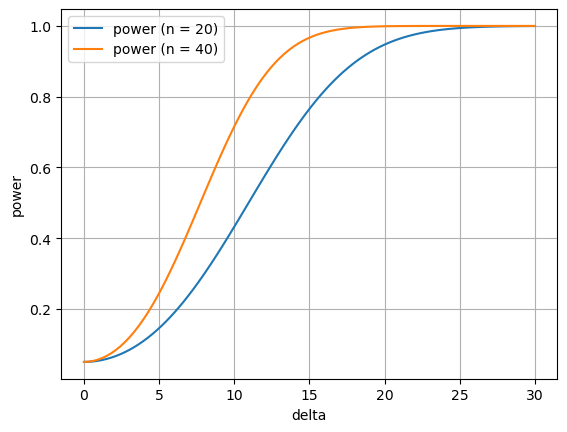

In [16]:
# Answer to point e
# Compute the power curve of the test
delta = np.linspace(0, 30, 100)
mu1 = mu0 + delta
Z_alpha2 = stats.norm.ppf(1 - alpha / 2)

# Compute the power curves for n = 20 and n = 40
n = 20
power_20 = 1 - stats.norm.cdf(Z_alpha2 - delta * np.sqrt(n) / sigma) + stats.norm.cdf(-Z_alpha2 - delta * np.sqrt(n) / sigma)
n = 40
power_40 = 1 - stats.norm.cdf(Z_alpha2 - delta * np.sqrt(n) / sigma) + stats.norm.cdf(-Z_alpha2 - delta * np.sqrt(n) / sigma)


# Plot the power curve
plt.plot(delta, power_20, label = "power (n = 20)")
plt.plot(delta, power_40, label = "power (n = 40)")
plt.xlabel("delta")
plt.ylabel("power")
plt.grid(True)
plt.legend()
plt.show()

# One-sample t-test

**Assumptions** 
- $X_1, X_2, ..., X_n$ is a random sample of size $n$ from a population.
- Population is **normal**.
- The **variance** of the population is <span style="color:red">**unknown**</span>

Under those assumptions, the quantity $T$ follows a Student-t distribution with $n-1$ degrees of freedom.
$$ T = \frac{\bar{X} - \mu}{{S}/{\sqrt{n}}} $$
Where:
- $S$ is the sample standard deviation

**Null hypothesis:** $H_0: \mu = \mu_0$

**Test statistic:** $ t_0 = \frac{\bar{X} - \mu_0}{{S}/{\sqrt{n}}} $

<center>

| Alternative hypotheses | Rejection criterion |
|----------|----------|
| $H_1: \mu \neq \mu_0$ | $\|t_0\| > t_{\alpha/2, n-1}$|
| $H_1: \mu > \mu_0$ | $t_0 > t_{\alpha, n-1}$|
| $H_1: \mu < \mu_0$ | $t_0 < -t_{\alpha, n-1}$|

</center>





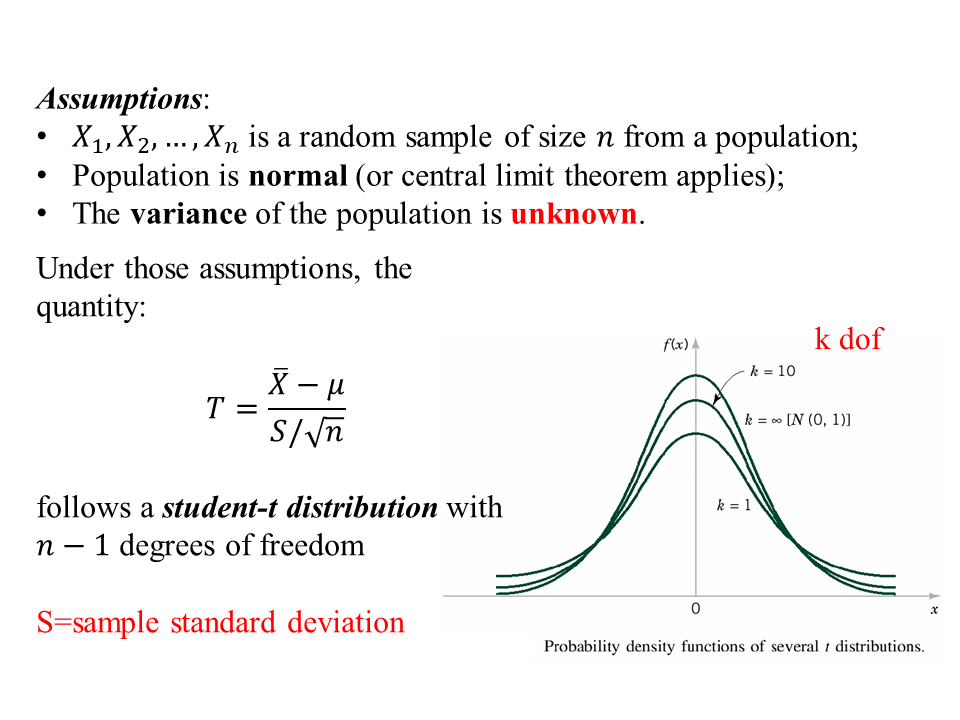

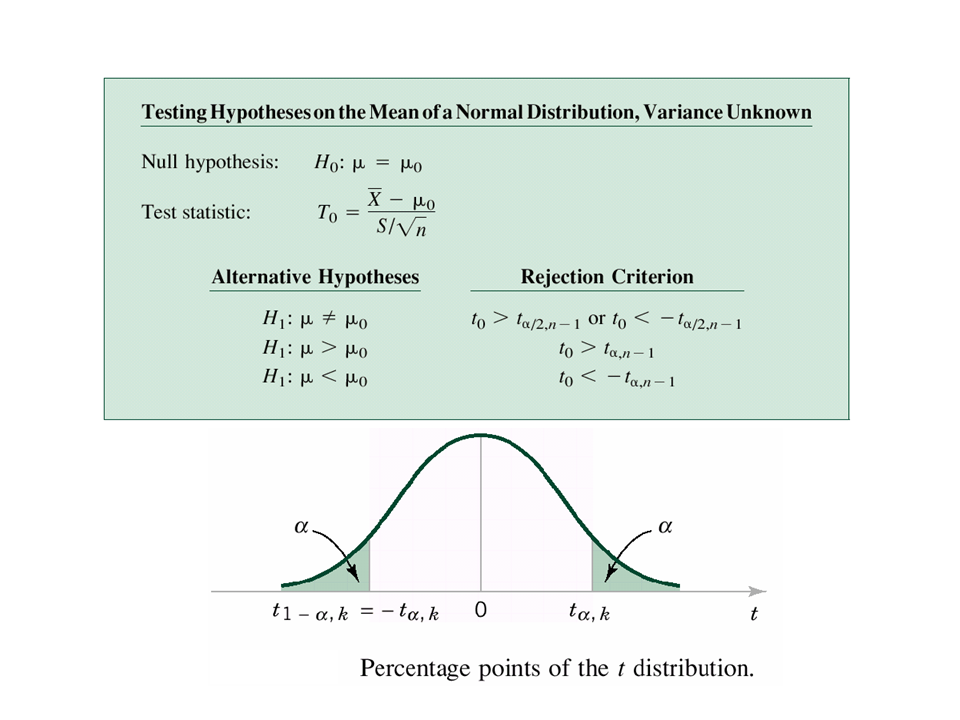

1 sample t test - confidence interval

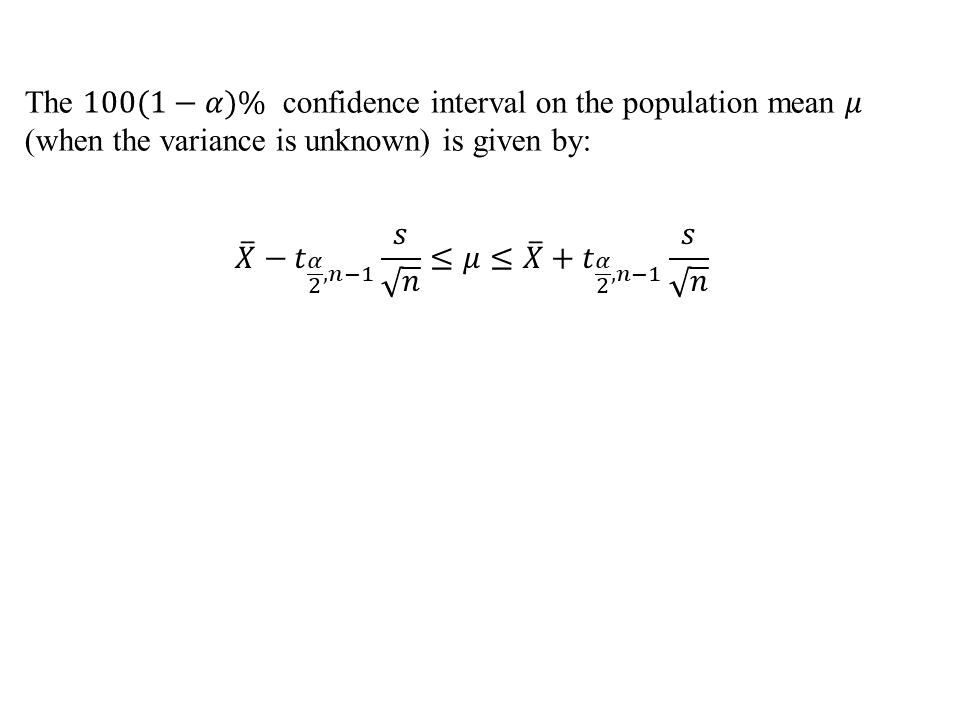

A quick example

In [17]:
# A quick example...
mu = 10     # mean
sigma = 1   # standard deviation
n = 40    # sample size

# Generate the random sample
np.random.seed(230320)
x1 = np.random.normal(mu, sigma, n)

In [18]:
print('S (ddof = 0) = %.3f' % np.std(x1))
print('S (ddof = 1) = %.3f' % np.std(x1, ddof=1))

S (ddof = 0) = 0.916
S (ddof = 1) = 0.927


In [19]:
# Choose the mean of the null hypothesis
mu0 = 10

# Calculate the t-statistic
t_0 = (np.mean(x1) - mu0) / (np.std(x1, ddof=1) / np.sqrt(n))

print('Test statistic t_0 = %.3f' % t_0)

Test statistic t_0 = -0.223


Let's test $H_0$ against $H_1: \mu \gt \mu_0$.

In [20]:

# Compare the t-statistic with the critical value
alpha = 0.05   # significance level
t_alpha = stats.t.ppf(1-alpha, n-1)

if t_0 > t_alpha:
    print('Reject the null hypothesis at alpha = %.2f' % alpha)
else:
    print('Accept the null hypothesis at alpha = %.2f' % alpha)

Accept the null hypothesis at alpha = 0.05


We can also compute the corresponding confidence interval as:
$$\mu \geq \bar{X} -  t_{\alpha, n-1} \cdot \frac{S}{\sqrt{n}}$$


In [21]:
# Compute the confidence interval
CI = np.mean(x1) - t_alpha * np.std(x1, ddof=1)/np.sqrt(n)
print('Confidence interval (lower bound): %.3f' % (CI))

Confidence interval (lower bound): 9.720


The p-value can be computed from the $t_0$ test statistic by applying the `cdf()` function.

In [22]:
pval = 1 - stats.t.cdf(t_0,n-1)
print('p-value = %.3f' % pval)

p-value = 0.588


Or you can use the built-in function `stats.ttest_1samp()`.

In [23]:
# Use the built-in function to make the t-test
t_0, pval = stats.ttest_1samp(x1, mu0, alternative='greater')
print('Test statistic t_0 = %.3f' % t_0)
print('p-value = %.3f' % pval)

Test statistic t_0 = -0.223
p-value = 0.588


# Chi-squared test for the variance (one sample)

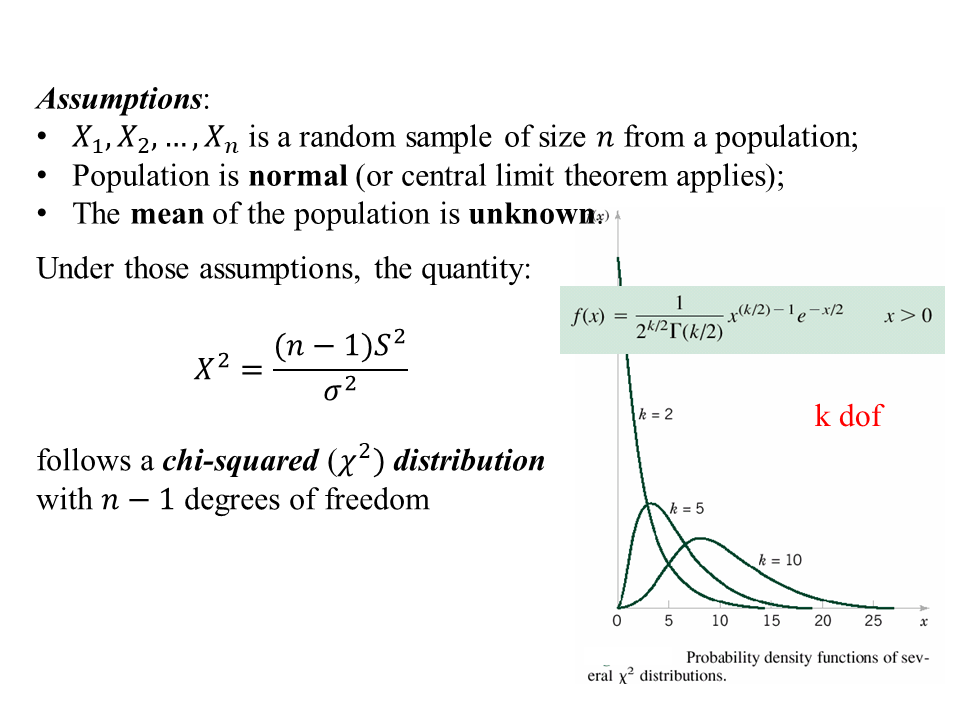

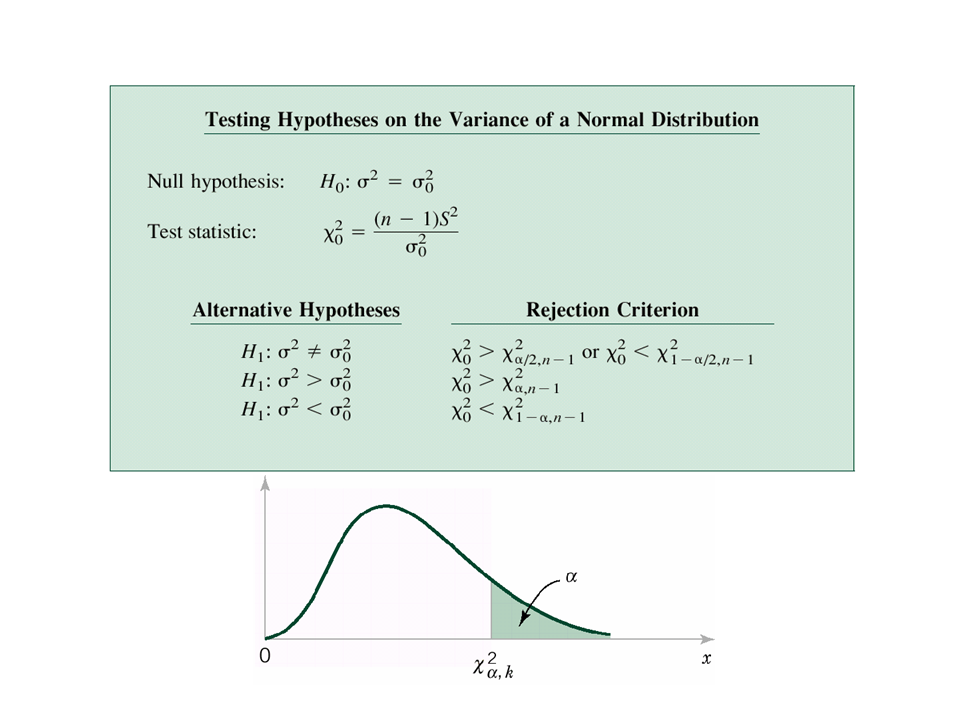

Chi-squared test for the variance - confidence interval

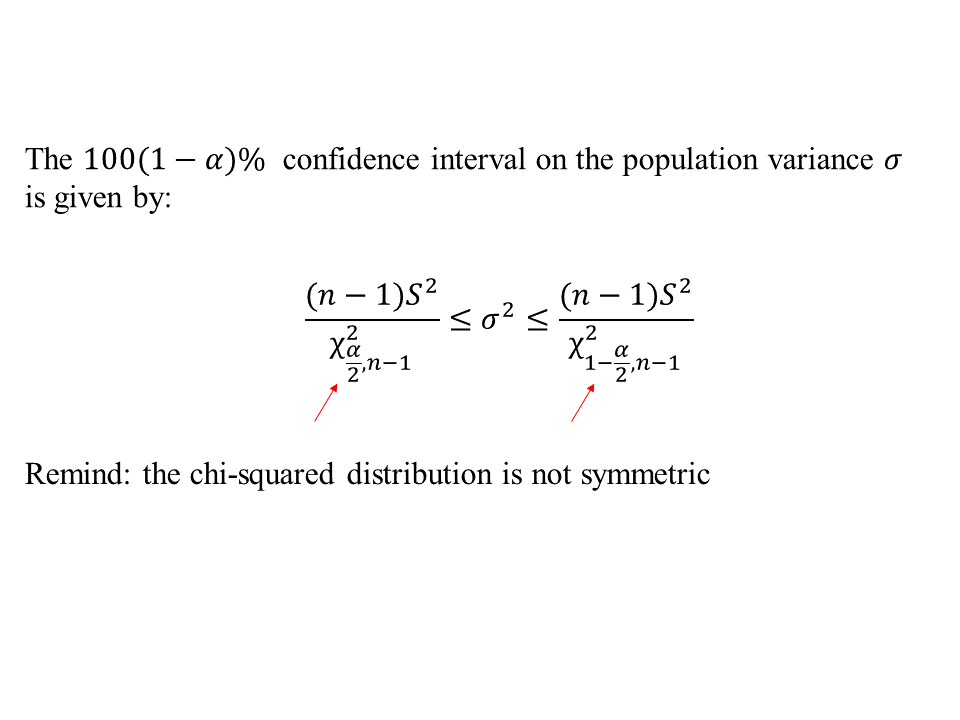

## EXERCISE 2

A study in the Journal of Food Engineering 282 (2020) investigates the use of the insect “Acheta domesticus (AD)” as source of protein as efficient alternative to conventional animal proteins. An extrusion process for the production of AD powder is investigated and various descriptors are analyzed. One of them is the water content (g water/100 g sample). 10 values of this descriptor are reported in ESE2_ex2.csv. 

a) Compute the lower limit of a one-sided confidence interval for the water content (99%)

b) Compute the two-sided confidence interval on the water content (98%)

c) Compute the upper limit of the one-sided interval for the variance (99%)

d) Compute a two-sided confidence interval for the standard deviation (98%)

e) Assuming that the maximum observed value (10.751) is wrong (true value is 10.33), recompute the two-sided confidence intervals (mean and variance) and comment

f) Assuming that the fourth observation 10.32 is wrong (true value is 10.33) recompute the two-sided confidence intervals (mean and variance) and comment

In [24]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Import the dataset
data = pd.read_csv('ESE2_ex2.csv')

# Inspect the dataset
data.head()

,Water content
0,10.100756
1,10.377559
2,10.415222
3,10.320178
4,10.216656


### Point a

Compute the lower limit of a one-sided CI for the water content (99%).

> ### Solution

In [25]:
# Input data
CL = 0.99       # Confidence level
alpha = 1 - CL  # Significance level
n = len(data)   # Sample size

> First of all, check the normality assumption. 

p-value of the Shapiro-Wilk test: 0.154


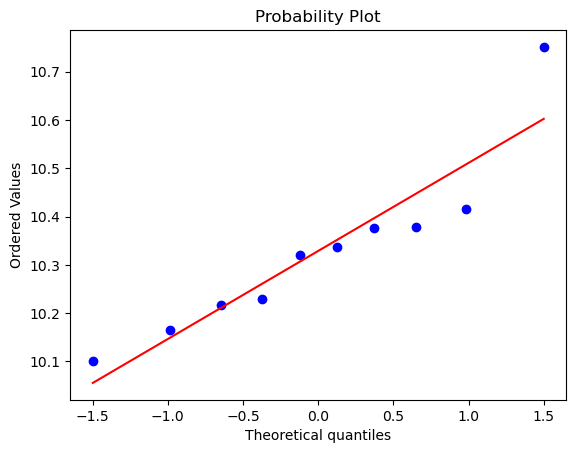

In [26]:

# Verify the normality of the data
# Shapiro-Wilk test
_, p_value_SW = stats.shapiro(data['Water content'])
print('p-value of the Shapiro-Wilk test: %.3f' % p_value_SW)

# QQ-plot
stats.probplot(data['Water content'], dist='norm', plot=plt)
plt.show()

In [27]:
# Anderson-Darling test
def ADpvalue(data):
    """
    This function computes the p-value of the Anderson-Darling test.
    
    Input:
        data: data to be tested
    Output:
        p_value_AD: p-value of the Anderson-Darling test

    """
    anderson = stats.anderson(data, dist='norm')
    # compute the p-value of the Anderson-Darling test
    if anderson.statistic >= 0.6:
        p_value_AD = np.exp(1.2937 - 5.709*anderson.statistic + 0.0186*(anderson.statistic**2))
    elif anderson.statistic >= 0.34:
        p_value_AD = np.exp(0.9177 - 4.279*anderson.statistic - 1.38*(anderson.statistic**2))
    elif anderson.statistic >= 0.2:
        p_value_AD = 1 - np.exp(-8.318 + 42.796*anderson.statistic - 59.938*(anderson.statistic**2))
    else:
        p_value_AD = 1 - np.exp(-13.436 + 101.14*anderson.statistic - 223.73*(anderson.statistic**2))

    return p_value_AD
    
p_value_AD = ADpvalue(data['Water content'])
print('p-value of the Anderson-Darling test: %.3f' % p_value_AD)

p-value of the Anderson-Darling test: 0.235


> We cannot reject the normality assumption, so we can use the t-test.
> 
> Remember the t-test statistic:
> 
> $$t_{n-1} = \frac{\bar{X} - \mu}{S/\sqrt{n}}$$
> 
> where $\bar{x}$ is the sample mean, $\mu$ is the population mean, $S$ is the sample standard deviation and $n$ is the sample size.
> 
> The two-sided CI for the mean is computed from:
> 
> $$Pr(-t_{\alpha/2,n-1} \leq \frac{\bar{X} - \mu}{S/\sqrt{n}} \leq t_{\alpha/2,n-1}) = 1 - \alpha$$
> 
> where $\alpha$ is the significance level. So the two-sided CI is:
> 
> $$\bar{X} - t_{\alpha/2,n-1} \frac{S}{\sqrt{n}} \leq \mu \leq \bar{X} + t_{\alpha/2,n-1} \frac{S}{\sqrt{n}}$$
> 
> The one-sided CI is:
> 
> $$\bar{X} - t_{\alpha,n-1} \frac{S}{\sqrt{n}} \leq \mu$$

In [28]:
# Compute the lower bound of the one-sided confidence interval
df = n - 1     # Degrees of freedom
t_alpha = stats.t.ppf(1 - alpha, df)
CI_lower = data['Water content'].mean() - t_alpha * data['Water content'].std() / np.sqrt(n)
print('Lower bound of the one-sided confidence interval: %.3f' % CI_lower)

Lower bound of the one-sided confidence interval: 10.168


> *Bonus: visualize the CI.*

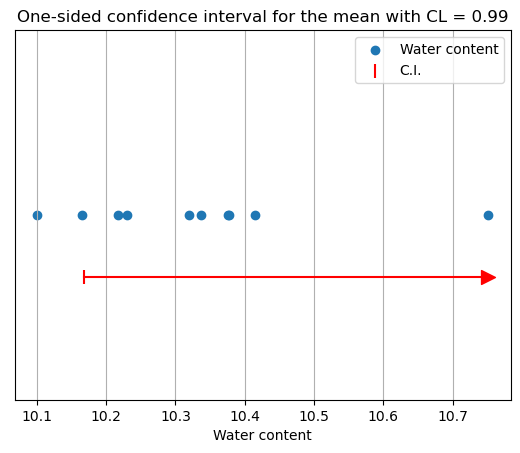

In [29]:
# Visualize the confidence interval on a dot plot
plt.title('One-sided confidence interval for the mean with CL = %.2f' % CL)
plt.scatter(data['Water content'], np.zeros(n), label='Water content')
# plot the confidence interval
plt.scatter(CI_lower, -0.01, label='C.I.', color='r', marker='|', s=100)
plt.plot([CI_lower, np.max(data['Water content'])], [-0.01, -0.01], color='r')
plt.scatter(np.max(data['Water content']), -0.01, color='r', marker='>', s=100)
# Add labels and legend
plt.ylim(-0.03, 0.03)
plt.xlabel('Water content')
plt.yticks([])
plt.legend()
plt.grid()
plt.show()

### Point b

Two sided CI on the mean (98%).

> ### Solution
> The two-sided CI on the mean is computed from:
>
> $$\bar{X} - t_{\alpha/2,n-1} \frac{S}{\sqrt{n}} \leq \mu \leq \bar{X} + t_{\alpha/2,n-1} \frac{S}{\sqrt{n}}$$

In [30]:
# Answer to point b
CL = 0.98       # Confidence level
alpha = 1 - CL  # Significance level

# Compute the two-sided confidence interval
t_alpha2 = stats.t.ppf(1 - alpha / 2, df)
CI_b = [data['Water content'].mean() - t_alpha2 * data['Water content'].std() / np.sqrt(n),
        data['Water content'].mean() + t_alpha2 * data['Water content'].std() / np.sqrt(n)]
print('Two-sided confidence interval (%.2f): [%.3f, %.3f]' % (CL, CI_b[0], CI_b[1]))

Two-sided confidence interval (0.98): [10.168, 10.490]


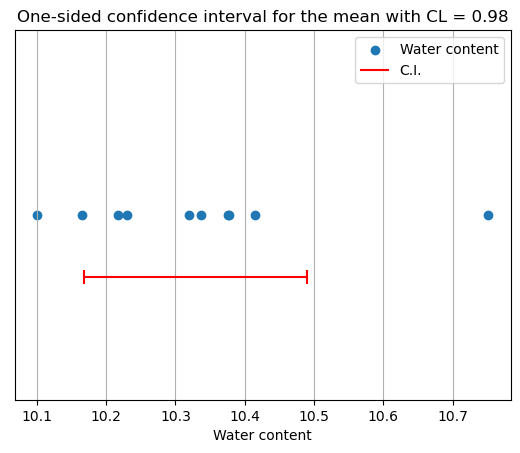

In [31]:
# Visualize the confidence interval on a dot plot
plt.title('One-sided confidence interval for the mean with CL = %.2f' % CL)
plt.scatter(data['Water content'], np.zeros(n), label='Water content')
# plot the confidence interval
plt.scatter(CI_b[0], -0.01, color='r', marker='|', s=100)
plt.scatter(CI_b[1], -0.01, color='r', marker='|', s=100)
plt.plot([CI_b[0], CI_b[1]], [-0.01, -0.01], color='r', label='C.I.')
# Add labels and legend
plt.ylim(-0.03, 0.03)
plt.xlabel('Water content')
plt.yticks([])
plt.legend()
plt.grid()
plt.show()

### Point c

One-sided (upper) CI on the variance (99%).

> ### Solution
> For this, we need to apply the Chi-squared test. The Chi-squared test statistic is:
> 
> $$\chi^2 = \frac{(n-1)S^2}{\sigma^2}$$
> 
> where $S^2$ is the sample variance and $\sigma^2$ is the population variance. 
> 
> The one-sided CI on the variance is computed from:
> 
> $$ \sigma^2 \leq \frac{(n-1)S^2}{\chi^2_{1-\alpha,n-1}}$$

In [32]:
# Answer to point c
CL = 0.99       # Confidence level
alpha = 1 - CL  # Significance level

# Compute the one-sided CI on the variance
df = n - 1      # Degrees of freedom
chi2 = stats.chi2.ppf(1-alpha, df)
CI_upper = df * data['Water content'].var() / chi2
print('Upper bound of the one-sided CI on the variance: %.3f' % CI_upper)

Upper bound of the one-sided CI on the variance: 0.013


### Point d

Two-sided CI on the standard deviation (98%).

> ### Solution
> For the two-sided CI on the standard deviation, we compute the CI on the variance and then we take the square root of the CI on the variance.
>
> $$ \frac{(n-1)S^2}{\chi^2_{\alpha/2,n-1}} \leq \sigma^2 \leq \frac{(n-1)S^2}{\chi^2_{1-\alpha/2,n-1}}$$

In [33]:
# Answer to point d
CL = 0.98       # Confidence level
alpha = 1 - CL  # Significance level

# Compute the two-sided CI on the variance
chi2_1 = stats.chi2.ppf(alpha / 2, df)
chi2_2 = stats.chi2.ppf(1 - alpha / 2, df)

CI_var = [df * data['Water content'].var() / chi2_2,
        df * data['Water content'].var() / chi2_1]

CI_stdev_d = np.sqrt(CI_var)
print('Two-sided CI on the standard deviation (CL = %.2f): [%.3f, %.3f]' % (CL, CI_stdev_d[0], CI_stdev_d[1]))

Two-sided CI on the standard deviation (CL = 0.98): [0.116, 0.374]


### Point e

Two-sided CI on the mean and stdev (98%) on corrected data. 

In [34]:
# Answer to point e

# Correct the data first
# Make a copy of data to avoid changing the original data
data_corrected = data.copy()
# Replace the maximum value in data_corrected with the value 10.33
data_corrected.loc[data_corrected['Water content'] == data_corrected['Water content'].max(), 'Water content'] = 10.33
# Alternatively, you can also modify the data in the csv and read it again

In [35]:
# Now you can re-run the code of point b using data_corrected
CL = 0.98       # Confidence level
alpha = 1 - CL  # Significance level

# Compute the two-sided confidence interval
t_alpha = stats.t.ppf(1 - alpha / 2, df)
CI = [data_corrected['Water content'].mean() - t_alpha * data_corrected['Water content'].std() / np.sqrt(n),
        data_corrected['Water content'].mean() + t_alpha * data_corrected['Water content'].std() / np.sqrt(n)]
print('Previous two-sided confidence (point b): [%.3f, %.3f]' % (CI_b[0], CI_b[1]))
print('Two-sided confidence interval on corrected data: [%.3f, %.3f]' % (CI[0], CI[1]))


Previous two-sided confidence (point b): [10.168, 10.490]
Two-sided confidence interval on corrected data: [10.195, 10.379]


In [36]:
# Re-run the code of point d using data_corrected for the two-sided CI on the stdev
CL = 0.98       # Confidence level
alpha = 1 - CL  # Significance level

# Compute the two-sided CI on the variance
chi2_1 = stats.chi2.ppf(alpha / 2, df)
chi2_2 = stats.chi2.ppf(1 - alpha / 2, df)

CI_var = [df * data_corrected['Water content'].var() / chi2_2,
        df * data_corrected['Water content'].var() / chi2_1]

CI_stdev = np.sqrt(CI_var)
print('Previous two-sided CI on the standard deviation (point d): [%.3f, %.3f]' % (CI_stdev_d[0], CI_stdev_d[1]))
print('Two-sided CI on the standard deviation (CL = %.2f): [%.3f, %.3f]' % (CL, CI_stdev[0], CI_stdev[1]))

Previous two-sided CI on the standard deviation (point d): [0.116, 0.374]
Two-sided CI on the standard deviation (CL = 0.98): [0.067, 0.214]


> <span style="color:orange">
> Evident change of confidence intervals both on the mean and the variance.
>
> Extreme values (outliers) have a strong influence, especially when the sample has a small size. 
> </span>

### Point f

Two-sided mean and confidence interval on mean and stdev (98%) on corrected data. 

In [37]:
# Answer to point f
# Correct the data first
# Make a copy of data to avoid changing the original data
data_corrected_2 = data.copy()
# Replace the fourth observation in data_corrected_2 with the true value 10.33
data_corrected_2.loc[3, 'Water content'] = 10.33

In [38]:
# Now you can re-run the code of point b using data_corrected_2 for the two-sided CI
CL = 0.98       # Confidence level
alpha = 1 - CL  # Significance level

# Compute the two-sided confidence interval
t_alpha = stats.t.ppf(1 - alpha / 2, df)
CI = [data_corrected_2['Water content'].mean() - t_alpha * data_corrected_2['Water content'].std() / np.sqrt(n),
        data_corrected_2['Water content'].mean() + t_alpha * data_corrected_2['Water content'].std() / np.sqrt(n)]
print('Previous two-sided confidence (point b): [%.3f, %.3f]' % (CI_b[0], CI_b[1]))
print('Two-sided confidence interval on corrected data: [%.3f, %.3f]' % (CI[0], CI[1]))

Previous two-sided confidence (point b): [10.168, 10.490]
Two-sided confidence interval on corrected data: [10.169, 10.491]


In [39]:
# Re-run the code of point d using data_corrected_2 for the two-sided CI on the stdev
CL = 0.98       # Confidence level
alpha = 1 - CL  # Significance level

# Compute the two-sided CI on the variance
chi2_1 = stats.chi2.ppf(alpha / 2, df)
chi2_2 = stats.chi2.ppf(1 - alpha / 2, df)

CI_var = [df * data_corrected_2['Water content'].var() / chi2_2,
        df * data_corrected_2['Water content'].var() / chi2_1]

CI_stdev = np.sqrt(CI_var)
print('Previous two-sided CI on the standard deviation (point d): [%.3f, %.3f]' % (CI_stdev_d[0], CI_stdev_d[1]))
print('Two-sided CI on the standard deviation (CL = %.2f): [%.3f, %.3f]' % (CL, CI_stdev[0], CI_stdev[1]))

Previous two-sided CI on the standard deviation (point d): [0.116, 0.374]
Two-sided CI on the standard deviation (CL = 0.98): [0.116, 0.374]


> <span style="color:orange">
> This time we changed a value that was closer to the expected value: the modification of the confidence intervals is much smaller than before.
> </span>